In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [2]:
#loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [3]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

## We are getting serious right now....

### Question: What features actually contributes to flood based on the features we have?

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


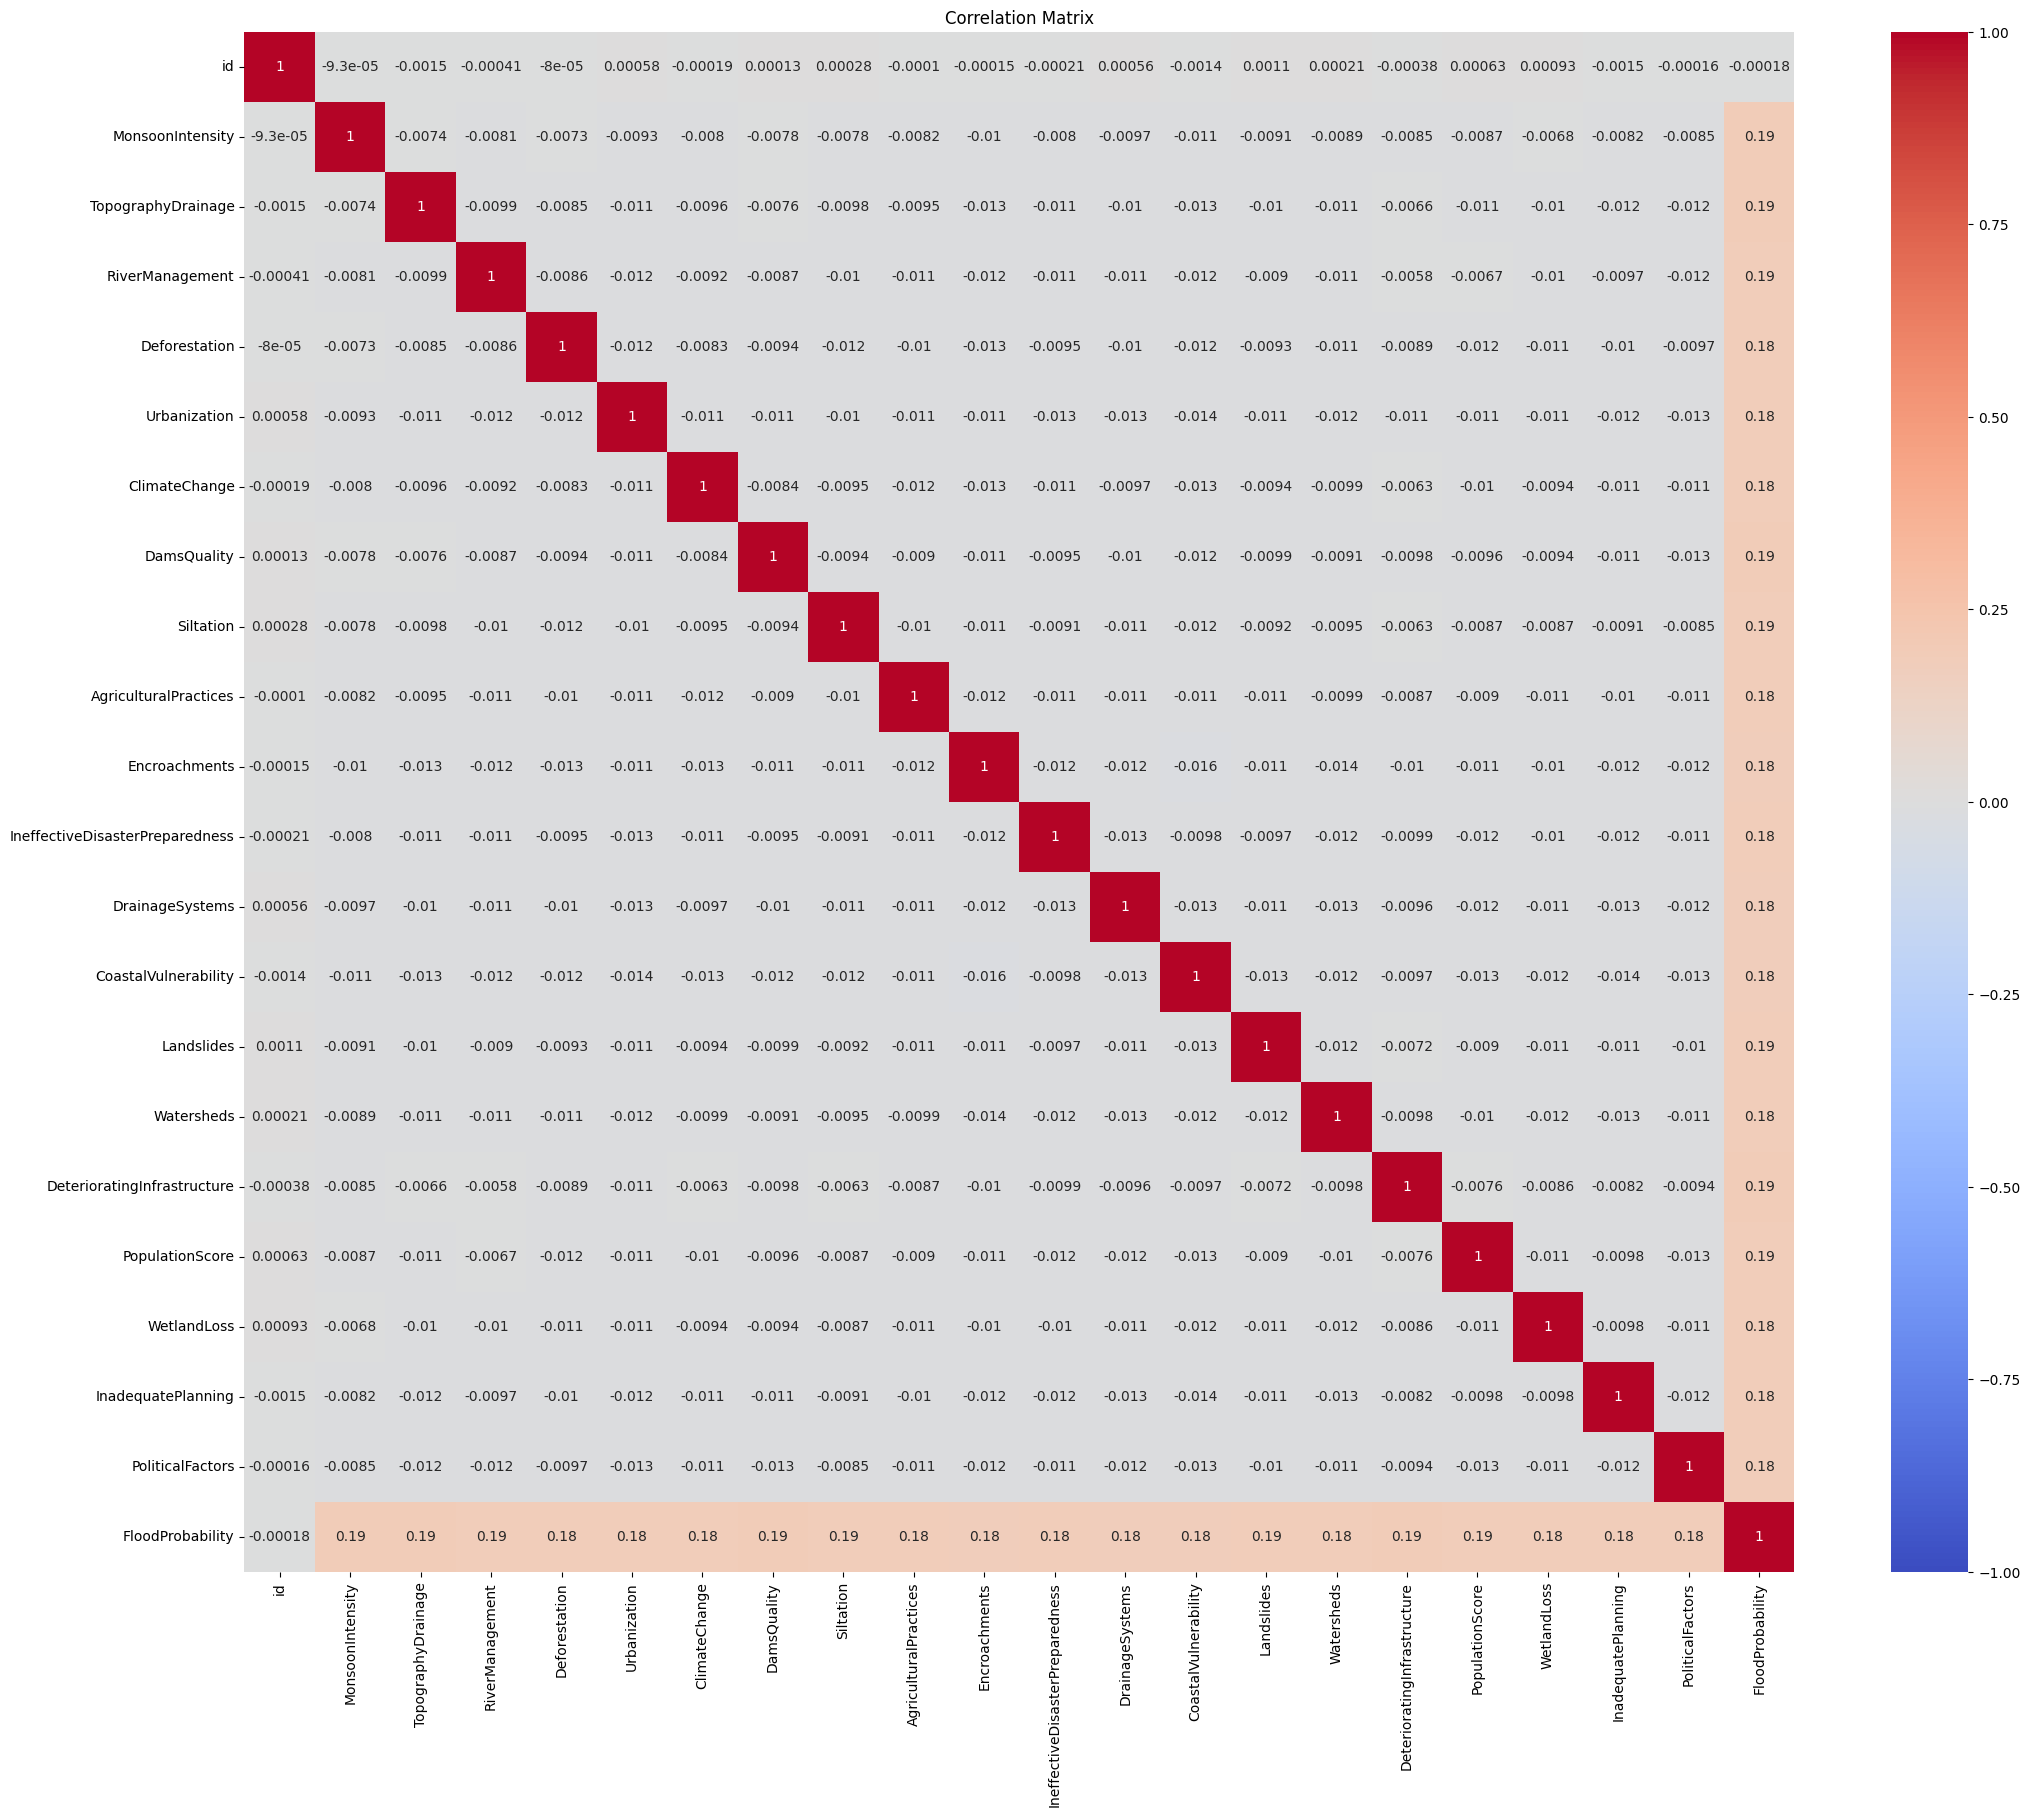

In [5]:
# Correlation matrix
plt.figure(figsize=(25, 20))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
selected_features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 
                     'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 
                     'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 
                     'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 
                     'PoliticalFactors']

# Define features and target variable
X = train[selected_features]
y = train['FloodProbability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                            Feature  Coefficient
16                  PopulationScore     0.005681
3                     Deforestation     0.005681
12             CoastalVulnerability     0.005671
2                   RiverManagement     0.005662
4                      Urbanization     0.005659
5                     ClimateChange     0.005659
6                       DamsQuality     0.005653
14                       Watersheds     0.005648
9                     Encroachments     0.005646
19                 PoliticalFactors     0.005646
1                TopographyDrainage     0.005645
13                       Landslides     0.005643
7                         Siltation     0.005640
10  IneffectiveDisasterPreparedness     0.005640
17                      WetlandLoss     0.005640
8             AgriculturalPractices     0.005639
11                  DrainageSystems     0.005633
15      DeterioratingInfrastructure     0.005618
0                  MonsoonIntensity     0.005613
18               Ina

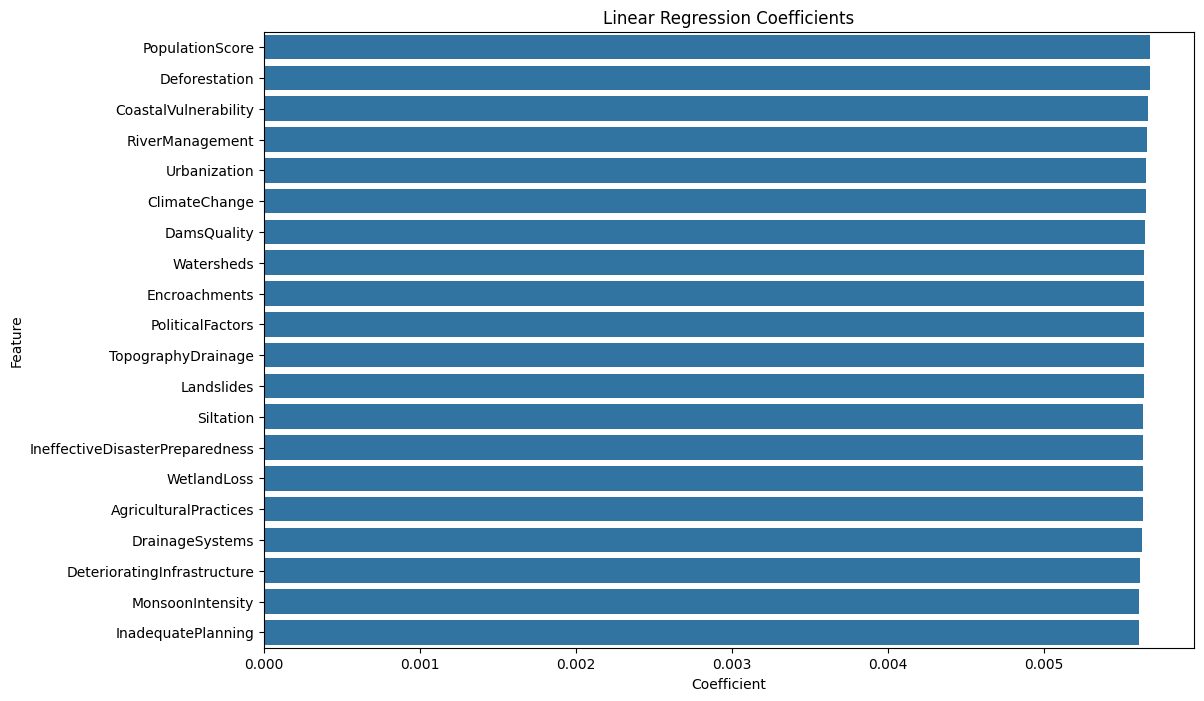

In [7]:
# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

### Answer 

Flooding is a complex phenomenon influenced by a variety of natural and human-induced factors. Based on general knowledge, research reports, and established facts, the following features from your dataset are known to generally affect flooding in an area:

- MonsoonIntensity: Heavy and prolonged monsoon rains can lead to increased water levels in rivers and reservoirs, causing floods.

- TopographyDrainage: The natural drainage patterns and topography of an area influence how water flows and accumulates, affecting flood risk.
- RiverManagement: Effective management of rivers, including embankments and floodplains, can mitigate flooding. Poor management can exacerbate it.
- Deforestation: Removal of trees reduces the land's ability to absorb water, leading to increased runoff and higher flood risk.
- Urbanization: Urban areas with impermeable surfaces like concrete increase runoff, reducing the land's natural ability to absorb water.
- ClimateChange: Changes in climate patterns, including increased frequency and intensity of extreme weather events, contribute to higher flood risks.
- DamsQuality: The condition and management of dams are crucial. Poorly maintained or managed dams can fail, leading to sudden flooding downstream.
- Siltation: Accumulation of silt in rivers and reservoirs reduces their capacity to hold water, increasing the likelihood of overflow during heavy rains.
- AgriculturalPractices: Certain practices can affect soil absorption and runoff. Poor practices can lead to increased erosion and sedimentation, affecting water flow.
- Encroachments: Building on floodplains and other natural water courses reduces the land available for water absorption and increases flood risk.
- IneffectiveDisasterPreparedness: Lack of adequate preparation and response plans can exacerbate the impacts of flooding when it occurs.
- DrainageSystems: Poorly designed or maintained drainage systems can lead to waterlogging and flooding, especially in urban areas.
- CoastalVulnerability: Coastal areas are particularly vulnerable to flooding from storm surges and sea-level rise.
- Landslides: Heavy rains can trigger landslides, which can block rivers and create temporary dams that might lead to sudden flooding if they fail.
- Watersheds: The health and management of watershed areas affect how water is collected and distributed in a region, influencing flood dynamics.
- DeterioratingInfrastructure: Aging infrastructure, such as bridges, culverts, and stormwater systems, can fail during heavy rains, exacerbating flooding.
- PopulationScore: Higher population densities can increase the impact of flooding due to greater numbers of people and infrastructure at risk.
- WetlandLoss: Wetlands act as natural sponges, absorbing and slowing down water flow. Their loss reduces this natural flood mitigation function.
- InadequatePlanning: Poor urban and regional planning can lead to development in flood-prone areas, increasing the risk and impact of flooding.
- PoliticalFactors: Governance and political decisions influence the implementation of flood mitigation measures and disaster response strategies.


From the features listed in your dataset, the following are known to generally affect flooding:

    MonsoonIntensity
    TopographyDrainage
    RiverManagement
    Deforestation
    Urbanization
    ClimateChange
    DamsQuality
    Siltation
    AgriculturalPractices
    Encroachments
    IneffectiveDisasterPreparedness
    DrainageSystems
    CoastalVulnerability
    Landslides
    Watersheds
    DeterioratingInfrastructure
    PopulationScore
    WetlandLoss
    InadequatePlanning
    PoliticalFactors

- All of our features have almost equal impact on the flood probability...

- so there's a limit to how far we can go with these features...

- Another observation made is that preprocessing might not really help the model performance...

## What's the way forward?? 

How about feature engineering?

In [8]:
## Something related to the Drainage System
df = train.copy()
df['MonsoonIntensity_DrainageSystems'] = df['MonsoonIntensity'] * df['DrainageSystems']
df['Urbanization_DrainageSystems'] = df['Urbanization'] * df['DrainageSystems']
df['ClimateChange_DrainageSystems'] = df['ClimateChange'] * df['DrainageSystems']
df['DamsQuality_DrainageSystems'] = df['DamsQuality'] * df['DrainageSystems']
df['Siltation_DrainageSystems'] = df['Siltation'] * df['DrainageSystems']
df['ClimateChange_Landslides'] = df['ClimateChange'] * df['Landslides']

# some aggregation
df['TotalScore'] = df[selected_features].sum(axis=1)
df['Infrastructure_Quality_Avg'] = df[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
df['Urbanization_Avg'] = df[['Urbanization', 'PopulationScore']].mean(axis=1)
df['ClimateChange_Avg'] = df[['ClimateChange', 'WetlandLoss']].mean(axis=1)

# Aggregated scores for risk factors
df['HumanImpactScore'] = df[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
df['NaturalRiskScore'] = df[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)


In [9]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,MonsoonIntensity_DrainageSystems,Urbanization_DrainageSystems,ClimateChange_DrainageSystems,DamsQuality_DrainageSystems,Siltation_DrainageSystems,ClimateChange_Landslides,TotalScore,Infrastructure_Quality_Avg,Urbanization_Avg,ClimateChange_Avg,HumanImpactScore,NaturalRiskScore
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445,25,30,20,20,15,12,94,4.333333,6.5,4.5,28,23
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450,42,56,56,21,35,0,94,5.000000,5.5,5.5,26,23
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530,42,21,49,7,35,49,99,4.666667,5.5,4.5,22,28
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535,6,8,16,8,14,56,104,3.333333,5.0,6.5,30,26
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415,10,8,8,6,6,24,72,3.000000,2.5,3.0,19,20


In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000000,279489.00,558978.000,838467.000000,1.117956e+06
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000000,3.00,5.000,6.000000,1.600000e+01
TopographyDrainage,1117957.0,4.926671,2.093879,0.000000,3.00,5.000,6.000000,1.800000e+01
RiverManagement,1117957.0,4.955322,2.072186,0.000000,4.00,5.000,6.000000,1.600000e+01
Deforestation,1117957.0,4.942240,2.051689,0.000000,4.00,5.000,6.000000,1.700000e+01
Urbanization,1117957.0,4.942517,2.083391,0.000000,3.00,5.000,6.000000,1.700000e+01
ClimateChange,1117957.0,4.934093,2.057742,0.000000,3.00,5.000,6.000000,1.700000e+01
DamsQuality,1117957.0,4.955878,2.083063,0.000000,4.00,5.000,6.000000,1.600000e+01
Siltation,1117957.0,4.927791,2.065992,0.000000,3.00,5.000,6.000000,1.600000e+01
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000000,3.00,5.000,6.000000,1.600000e+01


In [11]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [12]:
# training the regression model again
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
27,Infrastructure_Quality_Avg,1.933147e+09
30,HumanImpactScore,4.249658e+08
29,ClimateChange_Avg,1.810163e+08
2,RiverManagement,4.060265e+07
14,Watersheds,4.060265e+07
19,PoliticalFactors,4.060265e+07
10,IneffectiveDisasterPreparedness,4.060265e+07
7,Siltation,4.060265e+07
31,NaturalRiskScore,3.263755e+07
28,Urbanization_Avg,3.107696e+07


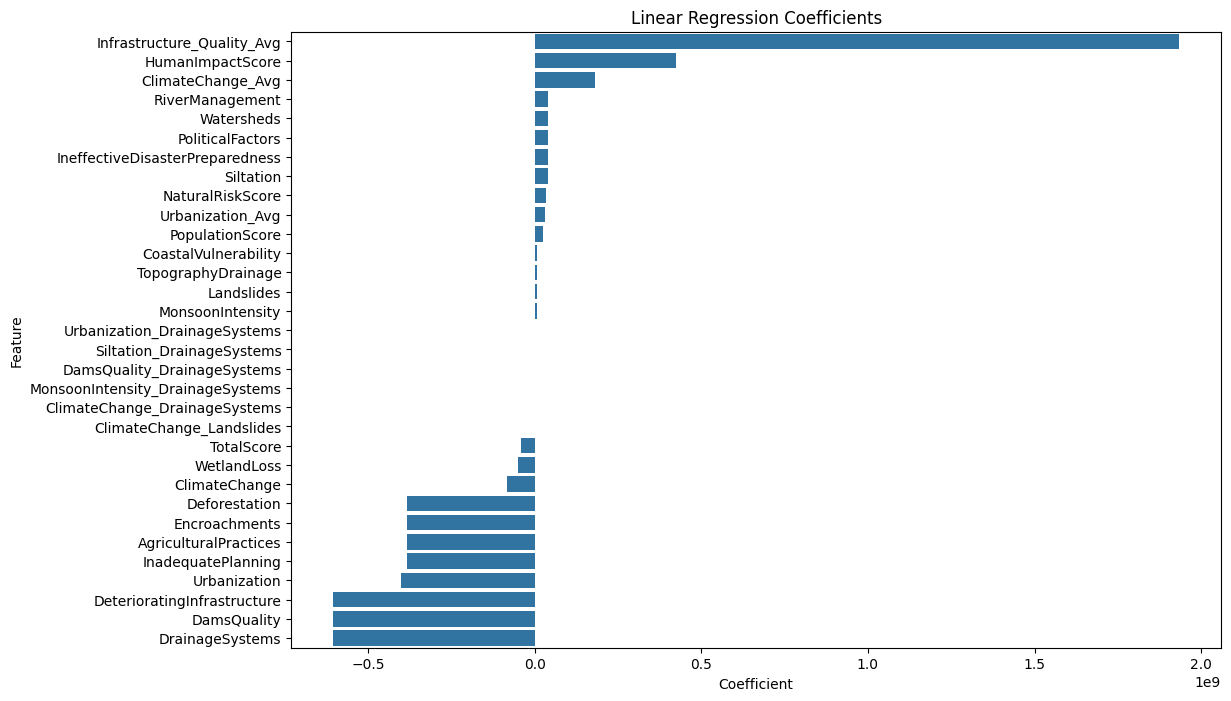

In [13]:
# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

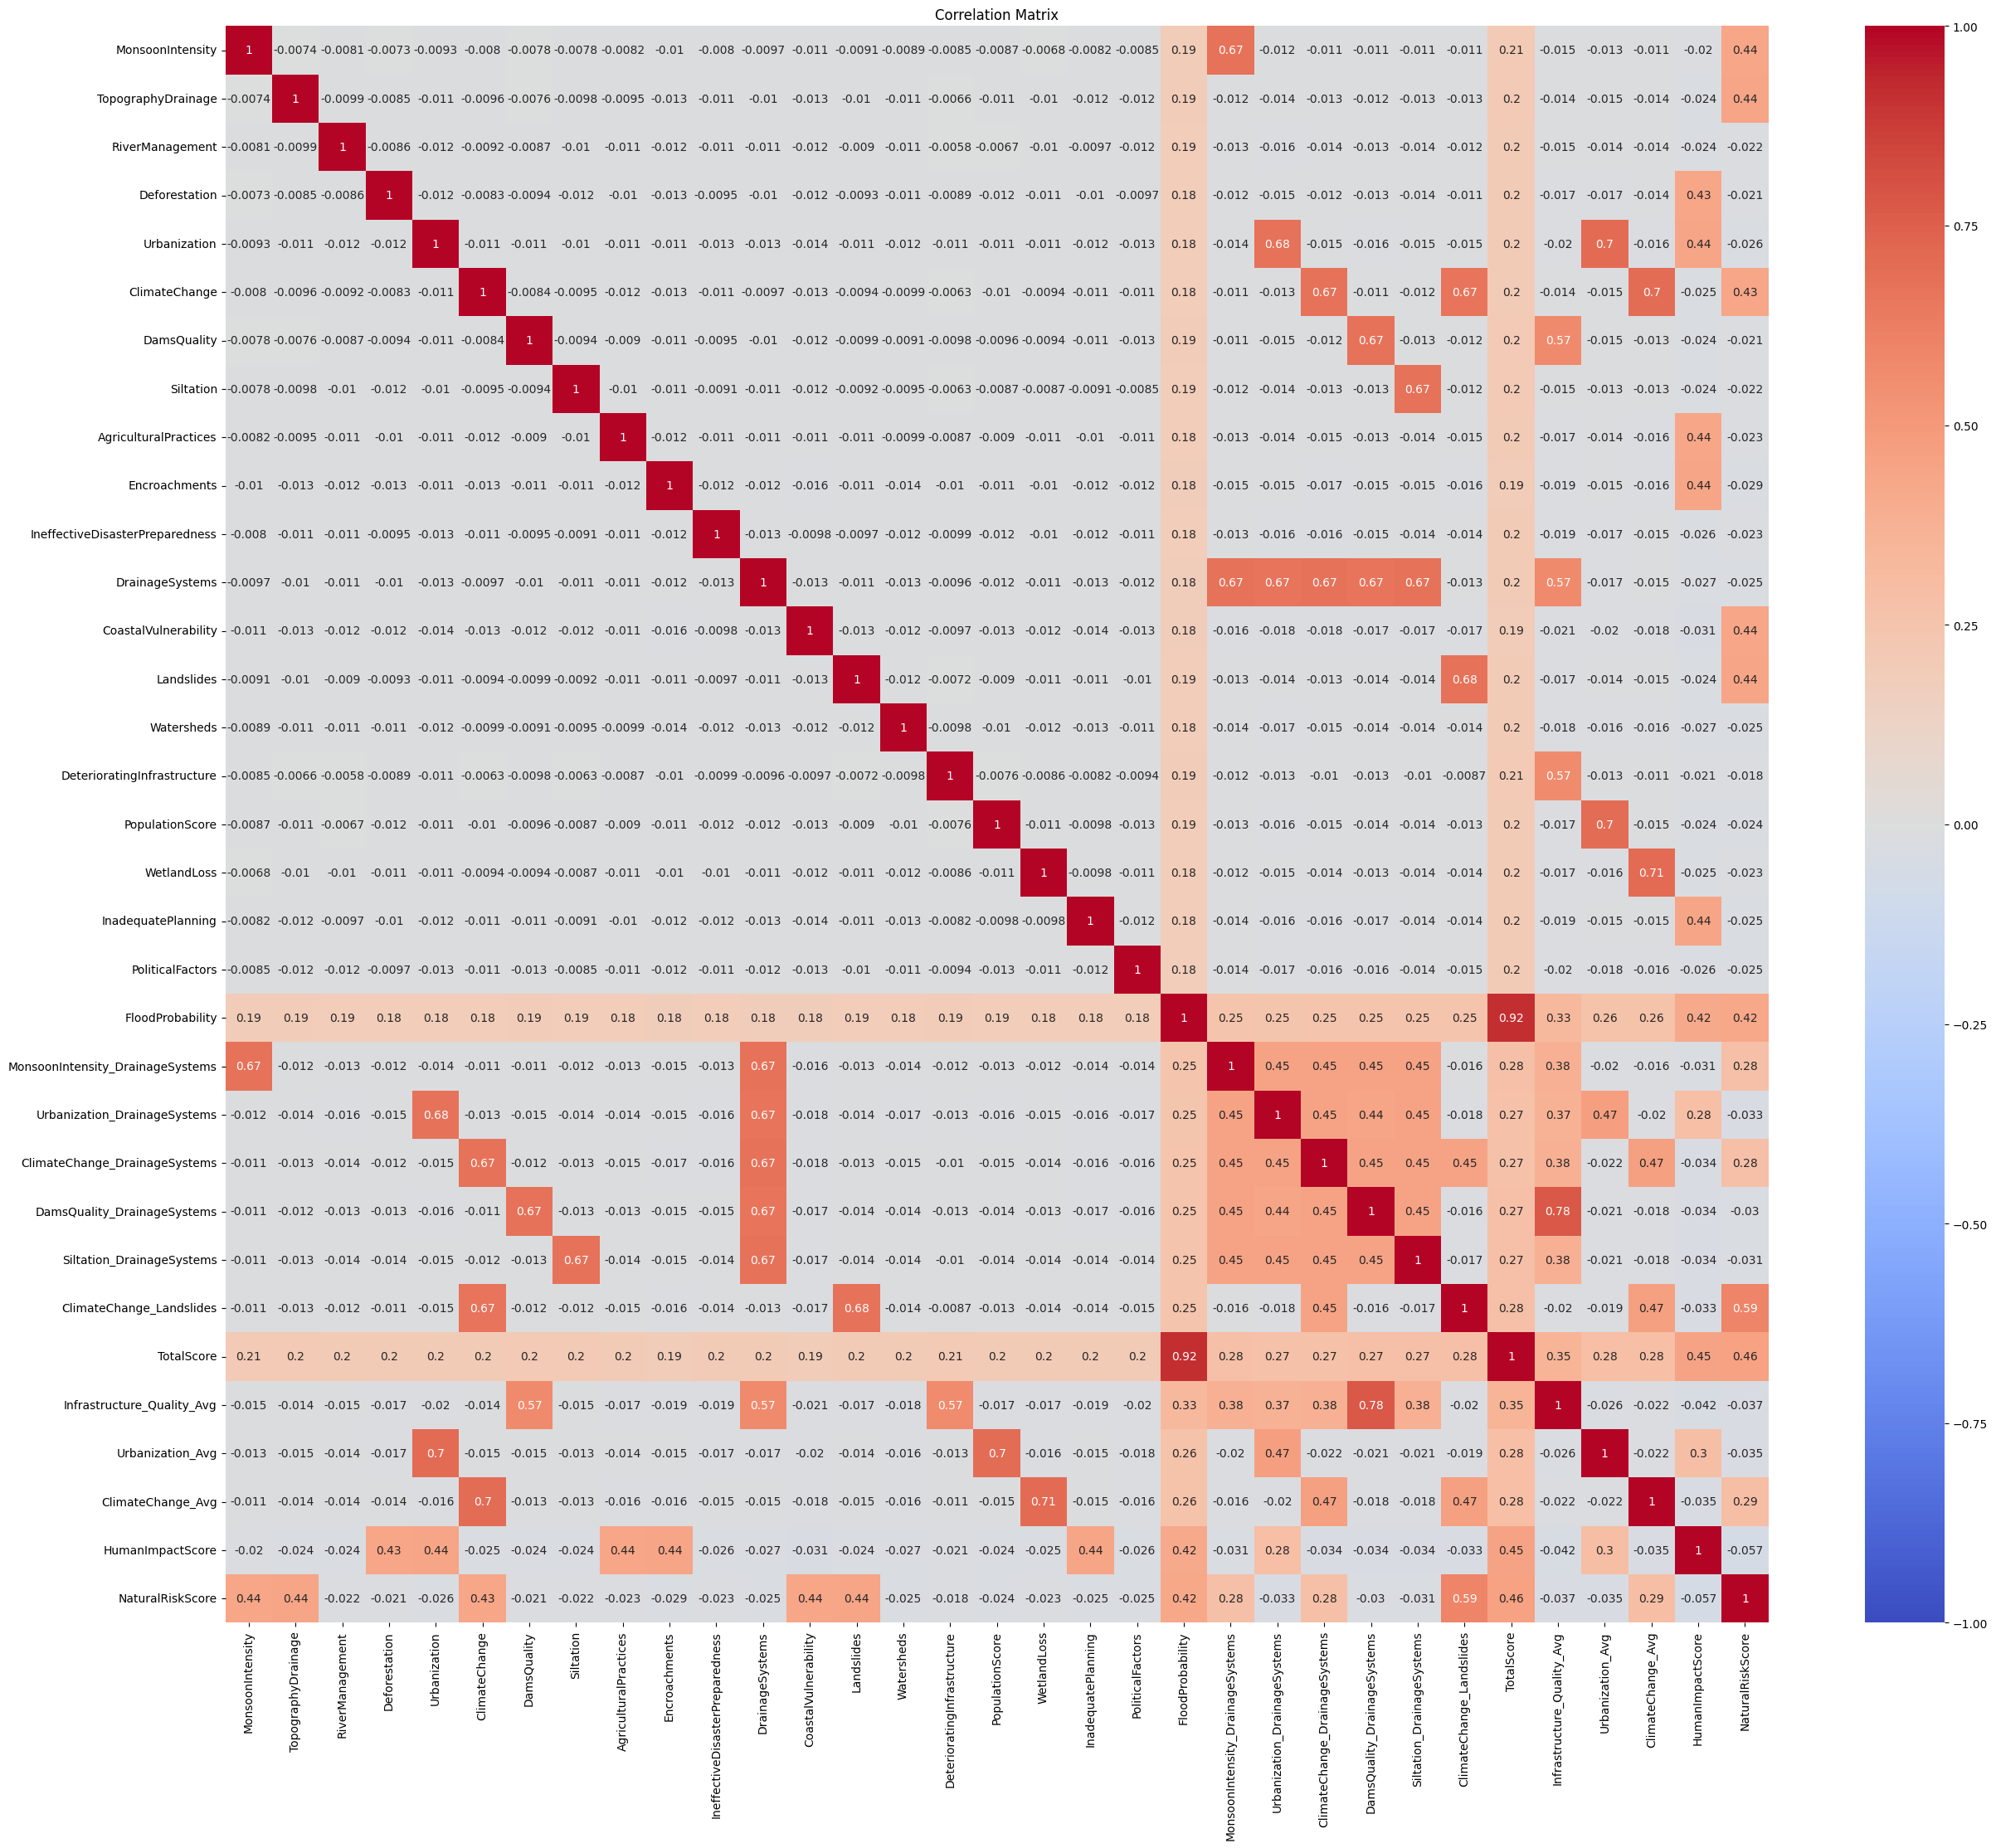

In [26]:
# Correlation matrix
plt.figure(figsize=(30, 25))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

##  Let GO!!!!!! -->

In [15]:
# Importing metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



In [17]:
# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00040317597758950834
Mean Absolute Error: 0.015793122414216414
R2 Score: 0.8448891124491301


In [18]:
# Trying catboost regressor
from catboost import CatBoostRegressor

# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034512997854128154
Mean Absolute Error: 0.014488568111113842
R2 Score: 0.8672207168392962


In [19]:
# looking at the best perfoming features
feature_importances = cat_model.get_feature_importance()
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
26,TotalScore,97.463390
0,MonsoonIntensity,0.207142
18,InadequatePlanning,0.149104
10,IneffectiveDisasterPreparedness,0.142206
7,Siltation,0.133437
9,Encroachments,0.130059
1,TopographyDrainage,0.126772
15,DeterioratingInfrastructure,0.126145
6,DamsQuality,0.107725
3,Deforestation,0.100569


In [20]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003456751970564399
Mean Absolute Error: 0.014466835841285408
R2 Score: 0.8670109589854157


In [22]:
# looking at the best perfoming features
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
26,TotalScore,0.959560
18,InadequatePlanning,0.001808
7,Siltation,0.001782
10,IneffectiveDisasterPreparedness,0.001700
9,Encroachments,0.001615
15,DeterioratingInfrastructure,0.001599
6,DamsQuality,0.001510
11,DrainageSystems,0.001508
0,MonsoonIntensity,0.001412
17,WetlandLoss,0.001330


In [23]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

### Trying out scaling methods

In [24]:
# minmax scaling

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)


In [25]:
# trying the models again
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0004031788568449248
Mean Absolute Error: 0.01579397104972974
R2 Score: 0.8448880047346631


In [27]:
# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
28,Urbanization_Avg,4.236722e+10
9,Encroachments,1.470629e+10
3,Deforestation,1.388928e+10
8,AgriculturalPractices,1.307226e+10
18,InadequatePlanning,1.307226e+10
29,ClimateChange_Avg,1.243939e+10
31,NaturalRiskScore,7.488451e+09
15,DeterioratingInfrastructure,4.236456e+09
11,DrainageSystems,4.236456e+09
6,DamsQuality,3.987253e+09


In [28]:
# Trying catboost regressor
from catboost import CatBoostRegressor

# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003449662739967359
Mean Absolute Error: 0.014477717421440592
R2 Score: 0.867283697668046


In [29]:
# looking at the best perfoming features
feature_importances = cat_model.get_feature_importance()
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
26,TotalScore,97.132954
0,MonsoonIntensity,0.216228
18,InadequatePlanning,0.162501
10,IneffectiveDisasterPreparedness,0.150171
9,Encroachments,0.142509
1,TopographyDrainage,0.140721
7,Siltation,0.139506
15,DeterioratingInfrastructure,0.133232
6,DamsQuality,0.117474
8,AgriculturalPractices,0.108941


In [30]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003456751970564399
Mean Absolute Error: 0.014466835841285408
R2 Score: 0.8670109589854157


In [31]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [32]:
# Robust Scaler

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

In [33]:
# trying the models again
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0004031740682410641
Mean Absolute Error: 0.01579384128204859
R2 Score: 0.8448898470185199


In [36]:
# Trying catboost regressor
from catboost import CatBoostRegressor

# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034492452576775456
Mean Absolute Error: 0.01447850751530048
R2 Score: 0.8672997591528837


In [35]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034587773276013043
Mean Absolute Error: 0.014492684350352307
R2 Score: 0.8669330389343551


In [34]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
Mean Squared Error: 0.0003454132106003902
Mean Absolute Error: 0.014509375681444708
R2 Score: 0.8671117510811331


### Testing the model performance on the leaderboard

In [37]:
# updating the test set
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [38]:
## Something related to the Drainage System

test['MonsoonIntensity_DrainageSystems'] = test['MonsoonIntensity'] * test['DrainageSystems']
test['Urbanization_DrainageSystems'] = test['Urbanization'] * test['DrainageSystems']
test['ClimateChange_DrainageSystems'] = test['ClimateChange'] * test['DrainageSystems']
test['DamsQuality_DrainageSystems'] = test['DamsQuality'] * test['DrainageSystems']
test['Siltation_DrainageSystems'] = test['Siltation'] * test['DrainageSystems']
test['ClimateChange_Landslides'] = test['ClimateChange'] * test['Landslides']

# some aggregation
test['TotalScore'] = test[selected_features].sum(axis=1)
test['Infrastructure_Quality_Avg'] = test[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
test['Urbanization_Avg'] = test[['Urbanization', 'PopulationScore']].mean(axis=1)
test['ClimateChange_Avg'] = test[['ClimateChange', 'WetlandLoss']].mean(axis=1)

# Aggregated scores for risk factors
test['HumanImpactScore'] = test[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
test['NaturalRiskScore'] = test[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)

In [44]:
# predicting the flood probability
X = test.drop('id', axis=1)

# Scaling the features
X_ = robust_scaler.transform(X)

y_pred = cat_model.predict(X_)


In [45]:
# opening the submission file
submission = pd.read_csv('sample_submission.csv')

# updating the submission file
submission['FloodProbability'] = y_pred

# saving the submission file
submission.to_csv('submission-5.csv', index=False)

In [46]:
submission

,id,FloodProbability
0,1117957,0.577447
1,1117958,0.452495
2,1117959,0.449506
3,1117960,0.470996
4,1117961,0.471455
...,...,...
745300,1863257,0.475562
745301,1863258,0.442604
745302,1863259,0.620392
745303,1863260,0.549065
